In [1]:
%load_ext autoreload
%autoreload 2
import cvxpy as cp
import numpy as np
from statesim.system.cartpole import CartPole
from statesim.system.inverted_pendulum import InvertedPendulum
from statesim.system.coupled_msd import CoupledMsd
from statesim.model.statespace import Lure
from statesim.simulator import DiscreteSimulator
from statesim.analysis.plot_simulation_results import (
    plot_states,
    plot_outputs,
    plot_inputs,
)
import matplotlib.pyplot as plt
from scipy import signal
from statesim.analysis.system_analysis import SystemAnalysisContinuous

from sympy import *
import matplotlib.pyplot as plt

\left[\begin{matrix}0 & 1\\\frac{g \cos{\left(x_{1} \right)}}{length} & - \frac{\mu_{p}}{length^{2} m_{p}}\end{matrix}\right]
\left[\begin{matrix}0\\\frac{1}{length^{2} m_{p}}\end{matrix}\right]
\left[\begin{matrix}0 & 1.0\\- \frac{1.0 g}{length} & - \frac{\mu_{p}}{length^{2} m_{p}}\end{matrix}\right]
\left[\begin{matrix}1 & \eta\\- \frac{\eta g}{length} & - \frac{\eta \mu_{p}}{length^{2} m_{p}} + 1\end{matrix}\right]
\left[\begin{matrix}0\\\frac{\eta}{length^{2} m_{p}}\end{matrix}\right]
Is system stable?: True
H inf norm: 22.593326937384266
Peak gain: 22.593326937384266
Eigenvalues: [-0.2 -0.2]


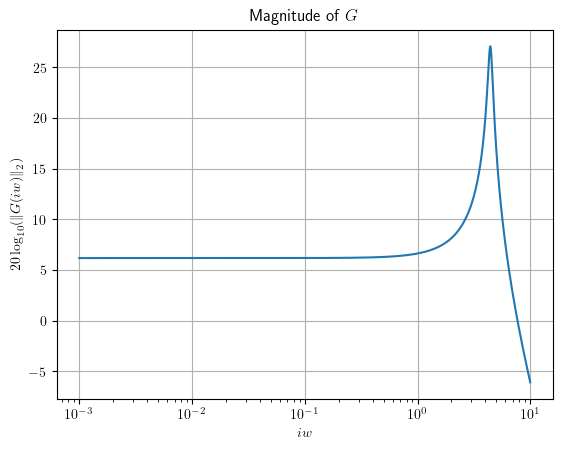

In [11]:
system = InvertedPendulum(mu_p=0.01)
x_bar = np.array([[np.pi], [0]])
A_symb, B_symb = system.get_linearization()
A_c, B_c = system.evaluate_linearization(
    A_sym=A_symb, B_sym=B_symb, x_bar=x_bar, u_bar=np.array([[0]])
)

eval_dict = {
    system._x1: x_bar[0, 0],
    system._x2: x_bar[1, 0],
    system._u: np.array(0),
}
print(latex(A_symb.evalf(subs=eval_dict)))
eta = symbols('eta')
print(
    latex(
        nsimplify(
            simplify(A_symb.evalf(subs=eval_dict) * eta + np.eye(system.nx))
        )
    )
)
print(latex(nsimplify(simplify(B_symb.evalf(subs=eval_dict) * eta))))


C_c = np.array([[1, 0]])
D_c = np.array([[0]])

ana = SystemAnalysisContinuous((A_c, B_c, C_c, D_c))
ana.plot_magnitude()
ana.analysis()

eta = 0.001
A_lin = A_c * eta + np.eye(system.nx)
B_lin = B_c * eta

\left[\begin{matrix}0 & 1.0 & 0 & 0\\0 & \frac{- \frac{1.0 m_{p} \mu_{c} \left. \frac{d}{d x_{2}} \operatorname{sign}{\left(x_{2} \right)} \right|_{\substack{ x_{2}=0.0 }}}{\left(m_{c} + m_{p}\right) \left(- \frac{1.0 m_{p}}{m_{c} + m_{p}} + 1.33333333333333\right)} - \mu_{c} \left. \frac{d}{d x_{2}} \operatorname{sign}{\left(x_{2} \right)} \right|_{\substack{ x_{2}=0.0 }}}{m_{c} + m_{p}} & \frac{\frac{1.68722975549459 \cdot 10^{-32} g m_{p}^{2}}{\left(m_{c} + m_{p}\right) \left(- \frac{0.75 m_{p}}{m_{c} + m_{p}} + 1.0\right)^{2}} - \frac{1.0 g m_{p}}{- \frac{1.0 m_{p}}{m_{c} + m_{p}} + 1.33333333333333}}{m_{c} + m_{p}} & - \frac{1.0 \mu_{p}}{length \left(m_{c} + m_{p}\right) \left(- \frac{1.0 m_{p}}{m_{c} + m_{p}} + 1.33333333333333\right)}\\0 & 0 & 0 & 1.0\\0 & - \frac{1.0 \mu_{c} \left. \frac{d}{d x_{2}} \operatorname{sign}{\left(x_{2} \right)} \right|_{\substack{ x_{2}=0.0 }}}{length \left(m_{c} + m_{p}\right) \left(- \frac{1.0 m_{p}}{m_{c} + m_{p}} + 1.33333333333333\right)} & \fr

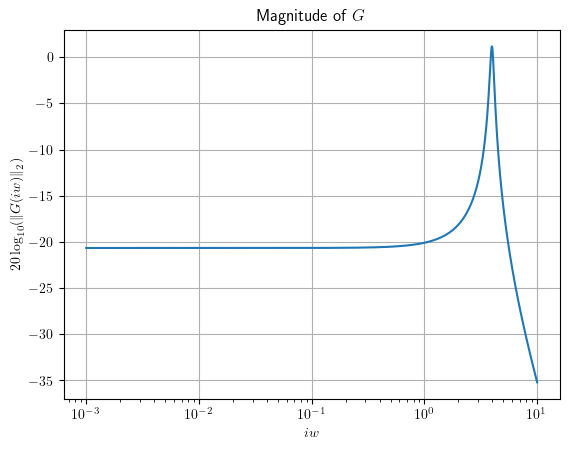

In [10]:
system = CartPole(mu_p=0.01)
x_bar = np.array([[0], [0], [np.pi], [0]])
A_symb, B_symb = system.get_linearization()
A_c, B_c = system.evaluate_linearization(
    A_sym=A_symb, B_sym=B_symb, x_bar=x_bar, u_bar=np.array([[0]])
)
C_c = np.array([[0, 0, 1, 0]])
D_c = np.array([[0]])

eval_dict = {
    system._x1: x_bar[0, 0],
    system._x2: x_bar[1, 0],
    system._x3: x_bar[2, 0],
    system._x4: x_bar[3, 0],
    system._u: np.array(0),
}
print(latex(A_symb.evalf(subs=eval_dict)))
eta = symbols('eta')
print(
    f'A lin discrete = {latex(nsimplify(simplify(A_symb.evalf(subs=eval_dict) * eta + np.eye(system.nx))))}'
)
print(
    f'B lin discrete = {latex(nsimplify(simplify(B_symb.evalf(subs=eval_dict) * eta)))}'
)

# discretize
eta = 0.001
A_lin = A_c * eta + np.eye(system.nx)
B_lin = B_c * eta

ana = SystemAnalysisContinuous((A_c, B_c, C_c, D_c))
ana.plot_magnitude()
ana.analysis()

Is system stable?: True
H inf norm: 40.821433364552014
Peak gain: 40.821433364552014
Eigenvalues: [-1.9460547  -0.72901457 -0.23062068 -0.23062068 -0.02734814 -0.02734814
 -0.3804762  -0.28685023]
A lin disc :\left[\begin{matrix}1 & \eta & 0 & 0 & 0 & 0 & 0 & 0\\- \frac{\eta \left(k_{0} + k_{1}\right)}{4 m_{0}} & \frac{- \eta \left(c_{0} + c_{1}\right) + m_{0}}{m_{0}} & \frac{\eta k_{1}}{4 m_{0}} & \frac{c_{1} \eta}{m_{0}} & 0 & 0 & 0 & 0\\0 & 0 & 1 & \eta & 0 & 0 & 0 & 0\\\frac{\eta k_{1}}{4 m_{1}} & \frac{c_{1} \eta}{m_{1}} & - \frac{\eta \left(k_{1} + k_{2}\right)}{4 m_{1}} & \frac{- \eta \left(c_{1} + c_{2}\right) + m_{1}}{m_{1}} & \frac{\eta k_{2}}{4 m_{1}} & \frac{c_{2} \eta}{m_{1}} & 0 & 0\\0 & 0 & 0 & 0 & 1 & \eta & 0 & 0\\0 & 0 & \frac{\eta k_{2}}{4 m_{2}} & \frac{c_{2} \eta}{m_{2}} & - \frac{\eta \left(k_{2} + k_{3}\right)}{4 m_{2}} & \frac{- \eta \left(c_{2} + c_{3}\right) + m_{2}}{m_{2}} & \frac{\eta k_{3}}{4 m_{2}} & \frac{c_{3} \eta}{m_{2}}\\0 & 0 & 0 & 0 & 0 & 0 & 1 & \e

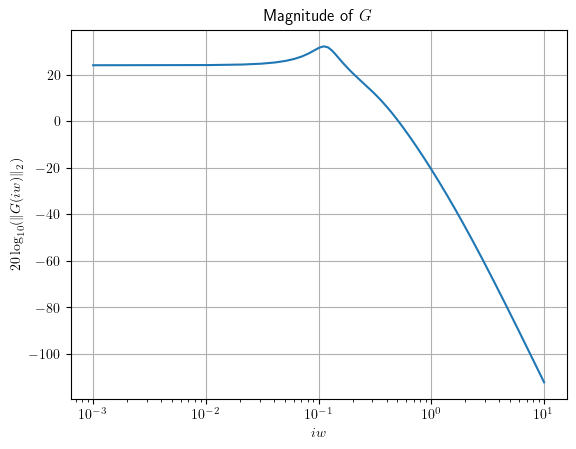

In [17]:
x_bar = np.zeros(shape=(8, 1))
system = CoupledMsd()
A_sym, B_sym = system.get_linearization()
A_c, B_c = system.evaluate_linearization(
    A_sym=A_sym,
    B_sym=B_sym,
    x_bar=x_bar,
    u_bar=np.array([[0]]),
)
C_c = np.zeros(shape=(1, 8))
C_c[0, -2] = 1
D_c = 0
ana = SystemAnalysisContinuous(system=(A_c, B_c, C_c, D_c))
ana.plot_magnitude()
ana.analysis()

eval_dict = {
    system._sym_dict['d0']: x_bar[0, 0],
    system._sym_dict['v0']: x_bar[1, 0],
    system._sym_dict['d1']: x_bar[2, 0],
    system._sym_dict['v1']: x_bar[3, 0],
    system._sym_dict['d2']: x_bar[4, 0],
    system._sym_dict['v2']: x_bar[5, 0],
    system._sym_dict['d3']: x_bar[6, 0],
    system._sym_dict['v3']: x_bar[7, 0],
    system._sym_dict['u']: np.array(0),
}
eta = symbols('eta')
print(
    f'A lin disc :{latex(nsimplify(simplify(A_sym.evalf(subs=eval_dict) * eta + np.eye(system.nx))))}'
)
print(
    f'B lin disc :{latex(nsimplify(simplify(B_sym.evalf(subs=eval_dict) * eta)))}'
)


eta = 0.001
A_lin = A_c * eta + np.eye(system.nx)
B_lin = B_c * eta